# BUSINESS INTELLIGENCE

## LAB ASSIGNMENT 4

## SUBMITTED BY: MAHA VAJEESHWARAN 

## ID: h21mahna@du.se

# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from lexical_diversity import lex_div as ld
import itertools
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
from PIL import Image
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
  
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to C:\Users\Maha
[nltk_data]     Vajeeshwaran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Maha
[nltk_data]     Vajeeshwaran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# LOADING 3 .txt files
Epi_4 = pd.read_csv(r"G:\BI LAB\L4\SW_EpisodeIV.txt",delim_whitespace=True,names=["index","character","dialogue"], skiprows=1,on_bad_lines='skip',index_col=0)
Epi_5 = pd.read_csv(r"G:\BI LAB\L4\SW_EpisodeV.txt",delim_whitespace=True,names=["index","character","dialogue"], skiprows=1,on_bad_lines='skip',index_col=0)
Epi_6 = pd.read_csv(r"G:\BI LAB\L4\SW_EpisodeVI.txt",delim_whitespace=True,names=["index","character","dialogue"], skiprows=1,on_bad_lines='skip',index_col=0)

In [3]:
Epi_4

character                                           dialogue
index                                                               
1        THREEPIO  Did you hear that?  They've shut down the main...
2        THREEPIO                                      We're doomed!
3        THREEPIO  There'll be no escape for the Princess this time.
4        THREEPIO                                       What's that?
5        THREEPIO  I should have known better than to trust the l...
...           ...                                                ...
1006         LUKE                                            Oh, no!
1007     THREEPIO  Oh, my!  Artoo!  Can you hear me?  Say somethi...
1008   TECHNICIAN               We'll get to work on him right away.
1009     THREEPIO  You must repair him!  Sir, if any of my circui...
1010         LUKE                                He'll be all right.

[1009 rows x 2 columns]

Epi_4 has 1009 records

In [4]:
Epi_5 

character                                           dialogue
index                                                             
1          LUKE  Echo Three to Echo Seven. Han, old buddy, do y...
2           HAN                    Loud and clear, kid. What's up?
3          LUKE  Well, I finished my circle. I don't pick up an...
4           HAN  There isn't enough life on this ice cube to fi...
5          LUKE  Right. I'll see you shortly. There's a meteori...
...         ...                                                ...
835        LUKE  I'll meet you at the rendezvous point on  Tato...
836       LANDO               Princess, we'll find Han. I promise.
837        LUKE           Chewie, I'll be waiting for your signal.
838        LUKE     Take care, you two. May the Force be with you.
839        LUKE                                                Ow!

[838 rows x 2 columns]

Epi_5 has 838 records

In [5]:
Epi_6

character  \
index                          
1            SHUTTLE CAPTAIN   
2      DEATH STAR CONTROLLER   
3            SHUTTLE CAPTAIN   
4                    OFFICER   
5                   OPERATOR   
...                      ...   
670                    LANDO   
671                    WEDGE   
672                    LANDO   
673                      HAN   
674                 THREEPIO   

                                                dialogue  
index                                                     
1      Command station, this is ST 321. Code Clearanc...  
2      The security deflector shield will be deactiva...  
3                           We're starting our approach.  
4      Inform the commander that Lord Vader's shuttle...  
5                                              Yes, sir.  
...                                                  ...  
670         Wedge, I don't think we're going to make it.  
671          You'll make it. Just follow me Gold Leader.  
672    I promised to return his ship without a scratc...  
673                                             Lando...  
674                                         They did it!  

[672 rows x 2 columns]

Epi_6 has 672 records

Your tasks:

## 1. Find the characters with the most dialogues in each episode of The Original Trilogy (Episodes IV, V, VI).


In [6]:
NDG_4 = pd.DataFrame(Epi_4.character.value_counts()).iloc[:10,]
NDG_5 = pd.DataFrame(Epi_5.character.value_counts()).iloc[:10,]
NDG_6 = pd.DataFrame(Epi_6.character.value_counts()).iloc[:10,]
NDG_4

character
LUKE              254
HAN               153
THREEPIO          118
BEN                82
LEIA               57
VADER              41
RED LEADER         37
BIGGS              34
TARKIN             28
OWEN               25

From the above table it is found that LUKE is most used dialogue in episode 4

In [7]:
NDG_5

character
HAN             181
LUKE            128
LEIA            114
THREEPIO         92
LANDO            61
VADER            56
YODA             36
PIETT            23
CREATURE         21
BEN              15

From the above table it is found that HAN is most used dialogue in episode 5

In [8]:
NDG_6

character
HAN             124
LUKE            112
THREEPIO         89
LEIA             55
VADER            43
LANDO            40
EMPEROR          39
JABBA            20
BEN              18
ACKBAR           14

From the above table it is found that HAN is most used dialogue in episode 6

## 2. Plot the number of dialogues according to the character for each episode (i.e. plot the above findings)

In [9]:
ep_4 = go.Bar(y=NDG_4.character, x=NDG_4.index,marker=dict(color="Blue"))
ep_5 = go.Bar(y=NDG_5.character,x=NDG_5.index,marker=dict(color="Gold"))
ep_6 = go.Bar(y=NDG_6.character, x=NDG_6.index,marker=dict(color="Pink"))
fig = tools.make_subplots(rows=3, cols=1,horizontal_spacing=1, subplot_titles=("Episode IV","Episode V","Episode VI"))
fig.append_trace(ep_4, 1, 1)         
fig.append_trace(ep_5, 2, 1)         
fig.append_trace(ep_6, 3, 1) 
fig['layout'].update(showlegend=True ,height=900,width=750,title=" characters with the most dialogues in each episode of The Original Trilogy") 
iplot(fig)

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



* From the above plot it is found that LUKE is most used dialogue in episode 4
* HAN is most used dialogue in episode 5& episode 6


## 3. Add a new column “episode” to the three datasets (to distinguish between the three episodes) and concatenate them into one dataset.


In [10]:
Epi_4['episode'] = 'IV'
Epi_5['episode'] = 'V'
Epi_6['episode'] = 'VI'

In [11]:
CON_epi = [Epi_4, Epi_5, Epi_6]
SW_df = pd.concat(CON_epi)
SW_df =SW_df.reset_index(drop=True)
SW_df

character                                           dialogue episode
0     THREEPIO  Did you hear that?  They've shut down the main...      IV
1     THREEPIO                                      We're doomed!      IV
2     THREEPIO  There'll be no escape for the Princess this time.      IV
3     THREEPIO                                       What's that?      IV
4     THREEPIO  I should have known better than to trust the l...      IV
...        ...                                                ...     ...
2514     LANDO       Wedge, I don't think we're going to make it.      VI
2515     WEDGE        You'll make it. Just follow me Gold Leader.      VI
2516     LANDO  I promised to return his ship without a scratc...      VI
2517       HAN                                           Lando...      VI
2518  THREEPIO                                       They did it!      VI

[2519 rows x 3 columns]

From the above we can see that added the seperate column called "episode" and we concatinated 3 data frame.

## 4. Discover the frequency distribution of words in The Original Trilogy.


In [12]:
Fr_distri = FreqDist(SW_df['dialogue']) # checking the no of recoreds for each dialogue
Fr_distri.most_common()

[('Yes, sir.', 9),
 ('What?', 8),
 ('Yes.', 6),
 ('Yes, my lord.', 6),
 ('No!', 5),
 ('Come on!', 5),
 ('What happened?', 4),
 ('What is it?', 4),
 ('As you wish.', 4),
 ('Where are you going?', 3),
 ('Oh, no!', 3),
 ('Chewie!', 3),
 ('Look!', 3),
 ('Yeah.', 3),
 ('Good luck.', 3),
 ('Thank you.', 3),
 ("We're doomed!", 2),
 ('What are you talking about?', 2),
 ("We're doomed.", 2),
 ('Uncle Owen...', 2),
 ('Yeah?', 2),
 ("Okay, let's go.", 2),
 ("I'm sorry.", 2),
 ('Commence primary ignition.', 2),
 ("What's going on?", 2),
 ('Come with me.', 2),
 ('All right.', 2),
 ('Luke!  Luke!  Luke!', 2),
 ('Luke!', 2),
 ('Where?', 2),
 ("I'm trying!", 2),
 ('Shut down all the garbage mashers on the detention level.', 2),
 ('Here they come!', 2),
 ('All wings report in.', 2),
 ('Are you all right?', 2),
 ('Almost there!', 2),
 ('Han!', 2),
 ('Thanks.', 2),
 ('You, too.', 2),
 ('Punch it!', 2),
 ('Artoo!', 2),
 ('Right.', 2),
 ('Mine!', 2),
 ('Lord Vader.', 2),
 ('Who are you?', 2),
 ('I know.', 

In [13]:
Fr_distri = FreqDist(SW_df['dialogue'])
Fr_distri.most_common(20) # distributed for the first 20 most recorded dialogue

[('Yes, sir.', 9),
 ('What?', 8),
 ('Yes.', 6),
 ('Yes, my lord.', 6),
 ('No!', 5),
 ('Come on!', 5),
 ('What happened?', 4),
 ('What is it?', 4),
 ('As you wish.', 4),
 ('Where are you going?', 3),
 ('Oh, no!', 3),
 ('Chewie!', 3),
 ('Look!', 3),
 ('Yeah.', 3),
 ('Good luck.', 3),
 ('Thank you.', 3),
 ("We're doomed!", 2),
 ('What are you talking about?', 2),
 ("We're doomed.", 2),
 ('Uncle Owen...', 2)]

## 5. Create a Frequency Distribution plot of the most repeated words in The Original Trilogy.

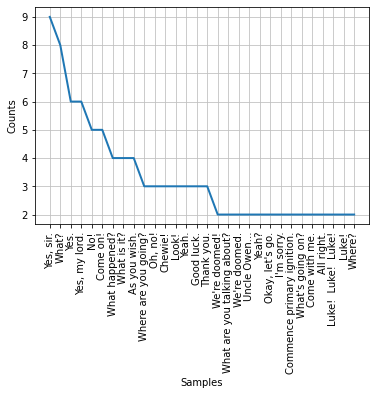

In [14]:
Fr_distri.plot(30,cumulative=False)
plt.show()

## Checking the frequencey distribution plot the dialogues that recorded most 30

## 6. Perform text-mining operations to prepare your dataset for further text analysis. (Use the NLTK library)
* a. Convert to lower case, word tokenization, removing stopwords, lexicon normalization (lemmatization), etc.
* b. Add the resulting array list to the dataset as a new column, “new_script”.

In [15]:
SW_df['new_script'] = SW_df.dialogue.apply(lambda x: ld.flemmatize(x)) # lemmatization is performed

In [16]:
stop_words = set(stopwords.words('english')) 
SW_df['new_script'] = SW_df.new_script.apply(lambda x: [item for item in x if item.lower() not in stop_words]) # removing stop words

In [17]:
SW_df['new_script'] =  SW_df.new_script.apply(lambda x: [item for item in x if item.isalpha()]) # removing punctuation

In [18]:
SW_df

character                                           dialogue episode  \
0     THREEPIO  Did you hear that?  They've shut down the main...      IV   
1     THREEPIO                                      We're doomed!      IV   
2     THREEPIO  There'll be no escape for the Princess this time.      IV   
3     THREEPIO                                       What's that?      IV   
4     THREEPIO  I should have known better than to trust the l...      IV   
...        ...                                                ...     ...   
2514     LANDO       Wedge, I don't think we're going to make it.      VI   
2515     WEDGE        You'll make it. Just follow me Gold Leader.      VI   
2516     LANDO  I promised to return his ship without a scratc...      VI   
2517       HAN                                           Lando...      VI   
2518  THREEPIO                                       They did it!      VI   

                                             new_script  
0     [hear, theyve, shut, main, reactor, well, dest...  
1                                                [doom]  
2                     [therell, escape, princess, time]  
3                                               [whats]  
4     [know, better, trust, logic, halfsized, thermo...  
...                                                 ...  
2514                     [wedge, dont, think, go, make]  
2515                [youll, make, follow, gold, leader]  
2516  [promise, return, ship, without, scratchi, sur...  
2517                                            [lando]  
2518                                                 []  

[2519 rows x 4 columns]

## Now cleaned new dataframe is forded

## 7. Repeat steps 4 & 5, but check the frequency distribution of the “new_script” this time.


In [19]:
# checking the frequency for the new_script
Tokeni = SW_df['new_script'].tolist()
Tokeni = list(itertools.chain.from_iterable(Tokeni))
freqDist = FreqDist(Tokeni)
freqDist.most_common()

[('get', 227),
 ('go', 222),
 ('dont', 180),
 ('im', 168),
 ('know', 131),
 ('luke', 125),
 ('come', 122),
 ('well', 121),
 ('right', 113),
 ('oh', 109),
 ('see', 103),
 ('sir', 89),
 ('youre', 88),
 ('take', 88),
 ('us', 83),
 ('artoo', 80),
 ('look', 79),
 ('good', 79),
 ('yes', 75),
 ('ship', 74),
 ('back', 73),
 ('one', 72),
 ('like', 67),
 ('think', 66),
 ('chewie', 64),
 ('must', 63),
 ('tell', 62),
 ('time', 61),
 ('let', 60),
 ('cant', 59),
 ('father', 59),
 ('help', 55),
 ('thats', 54),
 ('could', 53),
 ('ill', 53),
 ('master', 53),
 ('ive', 52),
 ('want', 51),
 ('vader', 51),
 ('make', 51),
 ('force', 51),
 ('say', 50),
 ('wait', 48),
 ('hes', 48),
 ('theres', 46),
 ('way', 46),
 ('friend', 46),
 ('power', 44),
 ('lord', 42),
 ('thing', 42),
 ('system', 42),
 ('side', 42),
 ('leave', 41),
 ('long', 40),
 ('shield', 39),
 ('theyre', 38),
 ('old', 38),
 ('jedi', 38),
 ('little', 37),
 ('need', 37),
 ('sure', 36),
 ('find', 36),
 ('stay', 36),
 ('didnt', 35),
 ('try', 35),
 ('mo

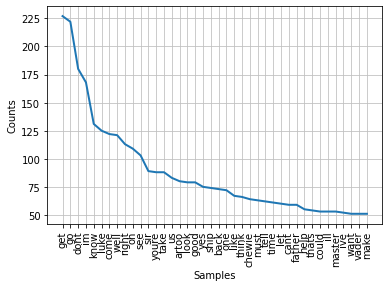

In [20]:
freqDist.plot(40,cumulative=False)
plt.show()

## It is found that word get appeared most with 227 records

## 8. Use Word Clouds to visually represent the most repeated words for Darth Vader and Yoda. (Use the provided word cloud masks, make a single word cloud for each character.)

In [21]:
# Defining data character to make the word cloud

LUKE=SW_df[SW_df.character=="LUKE"]
YODA=SW_df[SW_df.character=="YODA"]
VADER=SW_df[SW_df.character=="VADER"]
DARTH=SW_df[SW_df.character=="DARTH"]

In [22]:
#Defining the image for word mask
Mask_YODA = np.array(Image.open('YODA.png'))
Mask_VADER= np.array(Image.open("VADER.jpg"))

In [23]:
VADER

character                                           dialogue episode  \
11       VADER     Where are those transmissions you intercepted?      IV   
13       VADER  If this is a consular ship... where is the Amb...      IV   
14       VADER  Commander, tear this ship apart until you've f...      IV   
42       VADER  Don't play games with me, Your Highness.  You ...      IV   
44       VADER  You're a part of the Rebel Alliance... and a t...      IV   
...        ...                                                ...     ...   
2475     VADER                     You cannot hide forever, Luke.      VI   
2477     VADER  Give yourself to the dark side. It is the only...      VI   
2478     VADER  Sister! So...you have a twin sister. Your feel...      VI   
2503     VADER                  Luke, help me take this mask off.      VI   
2505     VADER  Nothing can stop that now. Just for once... le...      VI   

                                             new_script  
11                            [transmission, intercept]  
13                         [consular, ship, ambassador]  
14    [commander, tear, ship, apart, youve, found, p...  
42    [dont, play, game, highness, werent, mercy, mi...  
44    [youre, part, rebel, alliance, traitor, take, ...  
...                                                 ...  
2475                      [cannot, hide, forever, luke]  
2477  [give, dark, side, way, save, friend, yes, tho...  
2478  [sister, soyou, twin, sister, feeling, betray,...  
2503                           [luke, help, take, mask]  
2505                    [nothing, stop, let, look, eye]  

[140 rows x 4 columns]

In [24]:
DARTH_VADER = list(itertools.chain.from_iterable(VADER.new_script))

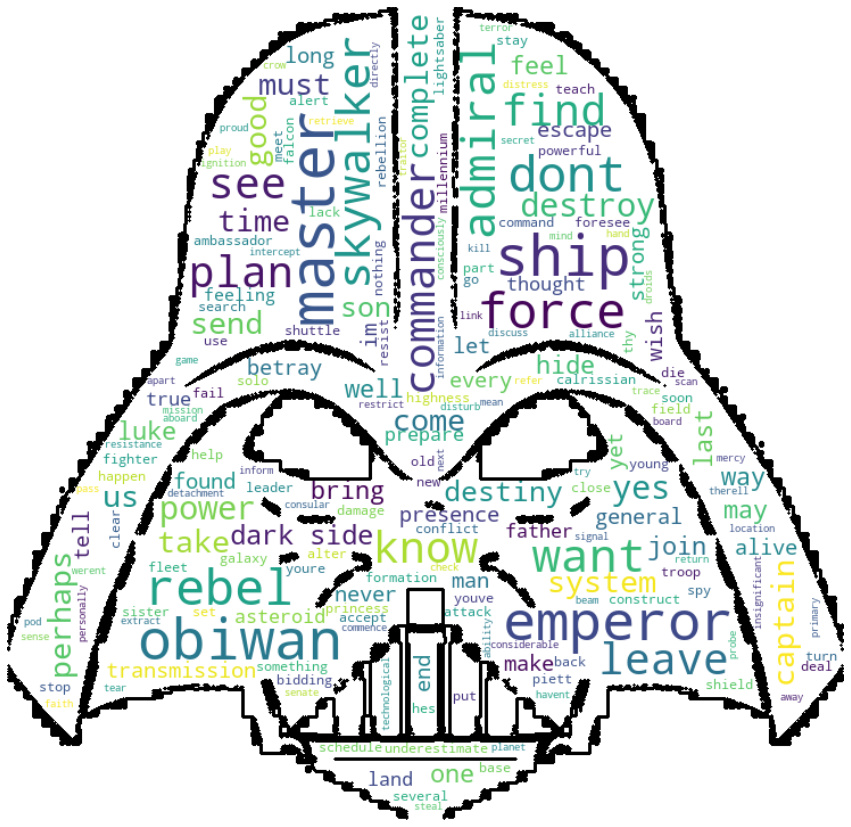

In [25]:
# Plot word mask of VADER
from wordcloud import WordCloud,STOPWORDS
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wc = WordCloud(mask=Mask_VADER,background_color="white",contour_width=3, contour_color="black",width=850,height=850).generate(" ".join(str(x) for x in DARTH_VADER))

plt.imshow(wc ,interpolation='bilinear')
plt.axis('off')

plt.show()

In [26]:
YODA = list(itertools.chain.from_iterable(YODA.new_script))

In [27]:
YODA

['hmmm',
 'much',
 'anger',
 'like',
 'father',
 'hah',
 'ready',
 'ready',
 'know',
 'ready',
 'eight',
 'hundred',
 'year',
 'train',
 'jedi',
 'counsel',
 'keep',
 'train',
 'jedi',
 'must',
 'deep',
 'commitment',
 'serious',
 'mind',
 'one',
 'long',
 'time',
 'watch',
 'never',
 'mind',
 'hmm',
 'hmph',
 'adventure',
 'heh',
 'excitement',
 'heh',
 'jedi',
 'crave',
 'thing',
 'reckless',
 'old',
 'yes',
 'old',
 'begin',
 'train',
 'finish',
 'begin',
 'oh',
 'run',
 'yes',
 'jedis',
 'strength',
 'flow',
 'force',
 'beware',
 'dark',
 'side',
 'angerfearaggression',
 'dark',
 'side',
 'force',
 'easily',
 'flow',
 'quick',
 'join',
 'fight',
 'start',
 'dark',
 'path',
 'forever',
 'dominate',
 'destiny',
 'consume',
 'obiwans',
 'apprentice',
 'nonono',
 'quick',
 'easy',
 'seductive',
 'know',
 'calm',
 'peace',
 'passive',
 'jedi',
 'use',
 'force',
 'knowledge',
 'defense',
 'never',
 'attack',
 'nothing',
 'teach',
 'today',
 'clear',
 'mind',
 'question',
 'mmm',
 'mmmmmm

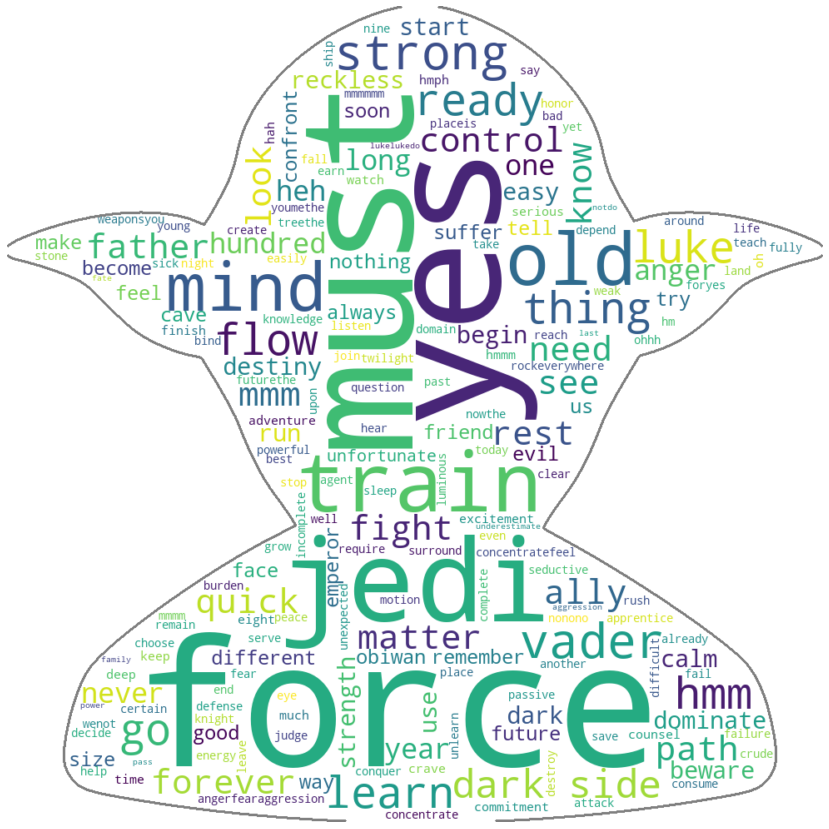

In [28]:
# Plot word mask of YODA
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wc = WordCloud(mask=Mask_YODA,background_color="white",contour_width=3, 
                      contour_color="gray",width=850,height=850).generate(" ".join(str(x) for x in YODA))
plt.imshow(wc ,interpolation='bilinear')
plt.axis('off')

plt.show()

## made the word cloud on darth vader and yoda by word masking

## 9. Discover the most relevant words in The Original Trilogy script.
## The TF-IDF model contains information on the more important and less important words (relevance).

In [29]:
Dg_all = " ".join(str(x) for x in SW_df['dialogue'])

In [30]:
Dg_all # displays all dialogues

"Did you hear that?  They've shut down the main reactor.  We'll be destroyed for sure.  This is madness! We're doomed! There'll be no escape for the Princess this time. What's that? I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister... Hurry up!  Come with me!  What are you waiting for?!  Get in gear! Artoo! Artoo-Detoo, where are you? At last!  Where have you been? They're heading in this direction. What are we going to do?  We'll be sent to the spice mines of Kessel or smashed into who knows what! Wait a minute, where are you going? The Death Star plans are not in the main computer. Where are those transmissions you intercepted? We intercepted no transmissions. Aaah...  This is a consular ship. Were on a diplomatic mission. If this is a consular ship... where is the Ambassador? Commander, tear this ship apart until you've found those plans and bring me the Ambassador.  I want her alive! There she is! Set for stun! She'll be all right

In [31]:
tfidf=TfidfVectorizer(use_idf=True, analyzer='word', stop_words= 'english') 

In [32]:
tfidf_vectors=tfidf.fit_transform([Dg_all])

In [33]:
tfidf_df = pd.DataFrame(tfidf_vectors[0].T.todense(),  index=tfidf.get_feature_names(), columns=["TF-IDF score"]) 
tfidf_df.sort_values(by=["TF-IDF score"],ascending=False).head(20)

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



TF-IDF score
don         0.311706
ll          0.266931
luke        0.235932
going       0.208378
oh          0.194601
right       0.194601
ve          0.192879
come        0.189435
know        0.180824
sir         0.154992
artoo       0.146381
just        0.141215
good        0.137771
yes         0.134327
got         0.134327
like        0.117105
chewie      0.111939
think       0.106772
ship        0.101606
let         0.101606

## The above table shows top 20 most important words

In [34]:
tfidf_df.sort_values(by=["TF-IDF score"],ascending=False).tail(10)

TF-IDF score
household       0.001722
hours           0.001722
hour            0.001722
hotwire         0.001722
hottest         0.001722
hotter          0.001722
horizontal      0.001722
hopes           0.001722
honorably       0.001722
learner         0.001722

## The above table shows bottom 10 less important words

## 10. Perform sentiment analysis on the movie scripts.

In [35]:
#imprting nltk libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [36]:
SW_df['sentiment_score'] = SW_df['dialogue'].apply(lambda dialogue: 
                                         SIA.polarity_scores(dialogue))
SW_df

character                                           dialogue episode  \
0     THREEPIO  Did you hear that?  They've shut down the main...      IV   
1     THREEPIO                                      We're doomed!      IV   
2     THREEPIO  There'll be no escape for the Princess this time.      IV   
3     THREEPIO                                       What's that?      IV   
4     THREEPIO  I should have known better than to trust the l...      IV   
...        ...                                                ...     ...   
2514     LANDO       Wedge, I don't think we're going to make it.      VI   
2515     WEDGE        You'll make it. Just follow me Gold Leader.      VI   
2516     LANDO  I promised to return his ship without a scratc...      VI   
2517       HAN                                           Lando...      VI   
2518  THREEPIO                                       They did it!      VI   

                                             new_script  \
0     [hear, theyve, shut, main, reactor, well, dest...   
1                                                [doom]   
2                     [therell, escape, princess, time]   
3                                               [whats]   
4     [know, better, trust, logic, halfsized, thermo...   
...                                                 ...   
2514                     [wedge, dont, think, go, make]   
2515                [youll, make, follow, gold, leader]   
2516  [promise, return, ship, without, scratchi, sur...   
2517                                            [lando]   
2518                                                 []   

                                        sentiment_score  
0     {'neg': 0.27, 'neu': 0.633, 'pos': 0.097, 'com...  
1     {'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...  
2     {'neg': 0.202, 'neu': 0.642, 'pos': 0.156, 'co...  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4     {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...  
...                                                 ...  
2514  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2515  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2516  {'neg': 0.223, 'neu': 0.511, 'pos': 0.266, 'co...  
2517  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2518  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  

[2519 rows x 5 columns]

In [37]:
# displaying sentiment score and compound score
SW_df['compound_score']  = SW_df['sentiment_score'].apply(lambda score_dict: score_dict['compound'])
SW_df 

character                                           dialogue episode  \
0     THREEPIO  Did you hear that?  They've shut down the main...      IV   
1     THREEPIO                                      We're doomed!      IV   
2     THREEPIO  There'll be no escape for the Princess this time.      IV   
3     THREEPIO                                       What's that?      IV   
4     THREEPIO  I should have known better than to trust the l...      IV   
...        ...                                                ...     ...   
2514     LANDO       Wedge, I don't think we're going to make it.      VI   
2515     WEDGE        You'll make it. Just follow me Gold Leader.      VI   
2516     LANDO  I promised to return his ship without a scratc...      VI   
2517       HAN                                           Lando...      VI   
2518  THREEPIO                                       They did it!      VI   

                                             new_script  \
0     [hear, theyve, shut, main, reactor, well, dest...   
1                                                [doom]   
2                     [therell, escape, princess, time]   
3                                               [whats]   
4     [know, better, trust, logic, halfsized, thermo...   
...                                                 ...   
2514                     [wedge, dont, think, go, make]   
2515                [youll, make, follow, gold, leader]   
2516  [promise, return, ship, without, scratchi, sur...   
2517                                            [lando]   
2518                                                 []   

                                        sentiment_score  compound_score  
0     {'neg': 0.27, 'neu': 0.633, 'pos': 0.097, 'com...         -0.6239  
1     {'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...         -0.6696  
2     {'neg': 0.202, 'neu': 0.642, 'pos': 0.156, 'co...         -0.1280  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
4     {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...          0.7351  
...                                                 ...             ...  
2514  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
2515  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
2516  {'neg': 0.223, 'neu': 0.511, 'pos': 0.266, 'co...          0.2100  
2517  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
2518  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  

[2519 rows x 6 columns]

In [38]:
# checking negative or positive sentiment
SW_df['compound_sentiment'] = SW_df['compound_score'].apply(lambda c: 'pos' if c >=0 else 'neg')
SW_df

character                                           dialogue episode  \
0     THREEPIO  Did you hear that?  They've shut down the main...      IV   
1     THREEPIO                                      We're doomed!      IV   
2     THREEPIO  There'll be no escape for the Princess this time.      IV   
3     THREEPIO                                       What's that?      IV   
4     THREEPIO  I should have known better than to trust the l...      IV   
...        ...                                                ...     ...   
2514     LANDO       Wedge, I don't think we're going to make it.      VI   
2515     WEDGE        You'll make it. Just follow me Gold Leader.      VI   
2516     LANDO  I promised to return his ship without a scratc...      VI   
2517       HAN                                           Lando...      VI   
2518  THREEPIO                                       They did it!      VI   

                                             new_script  \
0     [hear, theyve, shut, main, reactor, well, dest...   
1                                                [doom]   
2                     [therell, escape, princess, time]   
3                                               [whats]   
4     [know, better, trust, logic, halfsized, thermo...   
...                                                 ...   
2514                     [wedge, dont, think, go, make]   
2515                [youll, make, follow, gold, leader]   
2516  [promise, return, ship, without, scratchi, sur...   
2517                                            [lando]   
2518                                                 []   

                                        sentiment_score  compound_score  \
0     {'neg': 0.27, 'neu': 0.633, 'pos': 0.097, 'com...         -0.6239   
1     {'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...         -0.6696   
2     {'neg': 0.202, 'neu': 0.642, 'pos': 0.156, 'co...         -0.1280   
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
4     {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...          0.7351   
...                                                 ...             ...   
2514  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
2515  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
2516  {'neg': 0.223, 'neu': 0.511, 'pos': 0.266, 'co...          0.2100   
2517  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
2518  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   

     compound_sentiment  
0                   neg  
1                   neg  
2                   neg  
3                   pos  
4                   pos  
...                 ...  
2514                pos  
2515                pos  
2516                pos  
2517                pos  
2518                pos  

[2519 rows x 7 columns]

In [39]:
# checking thee count of negative and positive dialogues
A = SW_df.groupby("compound_sentiment")["compound_sentiment"].count()
A


compound_sentiment
neg     595
pos    1924
Name: compound_sentiment, dtype: int64

In [40]:
import plotly.express as px
fig = px.bar(A)
fig.show()

In [41]:
fig = px.pie(A,values = 'compound_sentiment', names = A.index)
fig.show()

In [42]:
B= SW_df[(SW_df["character"] == 'LUKE')].groupby("compound_sentiment")["compound_sentiment"].count()
B

compound_sentiment
neg    101
pos    393
Name: compound_sentiment, dtype: int64

In [43]:
fig = px.bar(B)
fig.show()

In [44]:
fig = px.pie(B,values = 'compound_sentiment', names = B.index)
fig.show()

## It is found that 79.6% of positive and 20.4% of negative dialogues in LUKE character by grouping

In [45]:
Y= SW_df[(SW_df["character"] == 'YODA')].groupby("compound_sentiment")["compound_sentiment"].count()
Y

compound_sentiment
neg    18
pos    31
Name: compound_sentiment, dtype: int64

In [46]:
fig = px.pie(Y,values = 'compound_sentiment', names = Y.index)
fig.show()

## It is found that 63.3% of positive and 36.7 % of negative dialogues inYODA character by grouping

In [47]:
V = SW_df[(SW_df["character"] == 'VADER')].groupby("compound_sentiment")["compound_sentiment"].count()
fig = px.pie(V,values = 'compound_sentiment', names = V.index)
fig.show()

## It is found that 73.6% of positive and 26.4% of negative dialogues in VADER character by grouping

In [48]:
E= SW_df[(SW_df["character"] == 'EMPEROR')].groupby("compound_sentiment")["compound_sentiment"].count()
fig = px.pie(E,values = 'compound_sentiment', names = E.index)
fig.show()

## It is found that 68.2 % of positive and 31.8% of negative dialogues in EMPEROR character by grouping

## Reference:
Libraries and Tutorial Articles: ( + all libraries from previous labs)
* NLTK 3.5 documentation
https://www.nltk.org/
* Text Analytics for Beginners using NLTK
https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
* Text Mining in Python: Steps and Examples
https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-andexamples-78b3f8fd913b
* Word Cloud for Python documentation
https://amueller.github.io/word_cloud/index.html
* Masked Wordcloud
https://amueller.github.io/word_cloud/auto_examples/masked.html
* Image Module
https://pillow.readthedocs.io/en/stable/reference/Image.html
* Getting Started with Chart Studio in Python
https://plotly.com/python/getting-started-with-chart-studio/
* Bar Charts in Python with Plotly (docs)
https://plotly.com/python/bar-charts/
* re — Regular expression operations (docs)
https://docs.python.org/3/library/re.html
* Regular Expressions in Python
https://www.pythonforbeginners.com/regex/regular-expressions-in-python
* Removing Stop Words from Strings in Python
https://stackabuse.com/removing-stop-words-from-strings-in-python/
* How to Use Tfidftransformer & Tfidfvectorizer
https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-
* Google
* Youtube
* stackoverflow